In [ ]:
import sklearn
import pandas as pd
import numpy as np
import random

from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

learning_rate, T = 0.001, 2000

#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                    train_size = 0.8,
                                                    test_size = 0.2,
                                                    random_state = 123,
                                                    stratify = y)
print("Labels for training and testing data")
print('Train sample labels : \n', train_y)
print('Test sample labels : \n', test_y)

print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

Labels for training and testing data
Train sample labels : 
 [1 0 1 0 0 2 0 0 2 1 0 0 0 2 0 2 0 2 1 0 0 1 2 2 1 1 0 2 1 2 1 2 2 1 0 2 2
 1 2 1 0 0 2 2 2 2 0 1 0 0 1 2 2 1 1 0 2 2 0 1 0 1 1 0 0 0 1 2 0 2 1 1 2 2
 0 2 0 1 1 2 2 0 1 0 0 1 1 2 1 1 2 2 2 0 1 1 1 0 0 1 2 1 2 2 0 0 2 1 2 1 1
 1 0 1 0 0 2 2 0 1]
Test sample labels : 
 [1 0 2 2 0 0 2 1 2 0 0 1 2 1 2 1 0 0 0 0 0 2 2 1 2 2 1 1 1 1]
All: [33.33333333 33.33333333 33.33333333]
Training: [33.33333333 33.33333333 33.33333333]
Test: [33.33333333 33.33333333 33.33333333]


In [ ]:
# Gradient descent and weight update
def gradient_descent(w, X, y, N):
  a = np.concatenate(([1], X))
  return np.log(1 + np.exp(-y*np.dot(w.T, a))) / N
def update_weight(w, learning_rate, gradient):
  return w-learning_rate*(gradient - sigmod(x))

# function to get the unique values in a list 
def unique(list1): 
  # intilize a null list 
  unique_list = [] 
      
  # traverse for all elements 
  for x in list1: 
    # check if exists in unique_list or not 
    if x not in unique_list: 
      unique_list.append(x) 
  return unique_list

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
def LogReg(X, y, test_X, test_y, learning_rate, T):
  N, d = X.data.shape
  classes = len(unique(y))
  test_N = test_X.shape[0]
  E_w_in = np.zeros((classes, T))
  E_w_out = np.zeros((classes, T))
  W = np.zeros((classes, d+1))

  y1 = np.ndarray(shape=(classes,N), dtype=int)
  test_y1 = np.ndarray(shape=(classes,test_N), dtype=int)

  for i in range(0, classes):
    for j in range(0, N):
      if y[j] == unique(y)[i]:
        y1[i][j] = 1
      else: 
        y1[i][j] = 0
    y1
    for j in range(0, test_N):
      if test_y[j] == unique(y)[i]:
        test_y1[i][j] = 1
      else: 
        test_y1[i][j] = 0
 
    w = np.random.uniform(low=-10.0, high=10.0, size=(d+1)) 
    g = np.zeros((T, N), dtype = int)

    for t in range (T):

      for l in range(0, N):
        if np.dot(w.T, np.concatenate(([1], X[l])))>=0:
          g[t, l] = 1
        else:
          g[t, l] = 0
   
    
      n = random.randrange(0, N, 1)
      gradient = gradient_descent(w, X[n], y1[i][n], N)
      w[:, 1] = update_weight(w[:, 1], learning_rate, gradient)

      Ew_in = 0
      Ew_out = 0
      for k in range (0, N):
        Ew_in += gradient_descent(w, X[k], y1[i][k], N)
      for k in range (0, test_N):
        Ew_out += gradient_descent(w, test_X[k], test_y1[i][k], test_N)
      E_w_in[i][t] = Ew_in/N
      E_w_out[i][t] = Ew_out/test_N

    W[i] = w.T

  return W, E_w_in, E_w_out, g

In [ ]:
w_train, e_train, e_test, g = LogReg(train_X, train_y, test_X, test_y, learning_rate, T)

In [ ]:
g

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 0, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 1]])

In [ ]:
c = 0
for i in range (2000):
  for j in range (120):
    if g[i][j] == 0:
      c = c+1

In [ ]:
c

7856

In [ ]:
w_train

array([[-2.42913987, -7.04046162, -5.92171087,  9.35383887, -4.66897562],
       [-1.85812994,  1.80700789, -2.20274285, -2.734097  , -6.00125711],
       [ 0.18169984,  1.14466013,  3.81132308, -2.19163473, -4.93414433]])

In [ ]:
e_train

array([[0.0851698 , 0.08515861, 0.08515836, ..., 0.07854421, 0.0785335 ,
        0.07852279],
       [0.02149724, 0.02149706, 0.02149688, ..., 0.02022977, 0.02022864,
        0.02022846],
       [0.00385082, 0.00385082, 0.00385082, ..., 0.01295613, 0.01295451,
        0.01300052]])

In [ ]:
e_test

array([[0.34676158, 0.34671465, 0.34671363, ..., 0.31897303, 0.31892812,
        0.31888322],
       [0.08278983, 0.08278913, 0.08278844, ..., 0.0778836 , 0.07787923,
        0.07787854],
       [0.01540327, 0.01540327, 0.01540327, ..., 0.04680909, 0.04680273,
        0.04698312]])

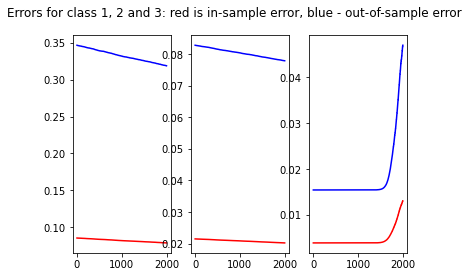

In [ ]:
import matplotlib.pyplot as plt
fig, e = plt.subplots(1, 3)
fig.suptitle('Errors for class 1, 2 and 3: red is in-sample error, blue - out-of-sample error')
t = np.arange(0, 2000, 1)
for i in range(0, 3):
  e[i].plot(t, e_train[i], 'r', e_test[i], 'b')